# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

79

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
clean_city_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []
lat_list = []
lng_list = []
index_count = 1
index_max = 50
set_count = 1

print('Beginning Data Retrieval')
print('----------------------------------------')

for index, city in enumerate(cities, start = 1):
    
    base_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
    
    try: 
        weather_json = requests.get(base_url).json()
        max_temp_list.append(weather_json['main']['temp_max'])
        humidity_list.append(weather_json['main']['humidity'])
        cloudiness_list.append(weather_json['clouds']['all'])
        wind_speed_list.append(weather_json['wind']['speed'])
        country_list.append(weather_json['sys']['country'])
        date_list.append(weather_json['dt'])
        clean_city_list.append(city)
        lat_list.append(weather_json['coord']['lat'])
        lng_list.append(weather_json['coord']['lon'])
        print(f'Processing record {index_count} of Set {set_count} | {city}')
        index_count = index_count + 1
        if index_count > index_max:
            index_count = 1
            set_count = set_count + 1
            
    except:
        print('City not found. Skipping...')

print('----------------------------------------')
print('Data Retrieval Complete')
print('----------------------------------------')

Beginning Data Retrieval
----------------------------------------
Processing record 1 of Set 1 | jamestown
Processing record 2 of Set 1 | mount gambier
Processing record 3 of Set 1 | dunedin
Processing record 4 of Set 1 | thompson
Processing record 5 of Set 1 | tuatapere
Processing record 6 of Set 1 | sinnamary
Processing record 7 of Set 1 | mataura
Processing record 8 of Set 1 | cherskiy
Processing record 9 of Set 1 | barrow
Processing record 10 of Set 1 | vestmanna
Processing record 11 of Set 1 | portland
Processing record 12 of Set 1 | wageningen
City not found. Skipping...
Processing record 13 of Set 1 | airai
City not found. Skipping...
Processing record 14 of Set 1 | vaini
Processing record 15 of Set 1 | butaritari
Processing record 16 of Set 1 | the valley
Processing record 17 of Set 1 | ozernovskiy
City not found. Skipping...
Processing record 18 of Set 1 | esperance
Processing record 19 of Set 1 | severo-kurilsk
Processing record 20 of Set 1 | hami
Processing record 21 of Set 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = pd.DataFrame({'City': clean_city_list,
                         'Lat': lat_list,
                          'Lng': lng_list,
                          'Max Temp': max_temp_list,
                          'Humidity': humidity_list,
                          'Cloudiness': cloudiness_list,
                          'Wind Speed': wind_speed_list,
                          'Country': country_list,
                          'Date': date_list})
city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,291.09,93,75,0.45,US,1624153929
1,mount gambier,-37.8333,140.7667,285.10,82,85,4.12,AU,1624153649
2,dunedin,-45.8742,170.5036,284.15,92,100,5.81,NZ,1624153930
3,thompson,55.7435,-97.8558,283.24,93,90,3.60,CA,1624153931
4,tuatapere,-46.1333,167.6833,281.25,74,1,1.14,NZ,1624153931
...,...,...,...,...,...,...,...,...,...
65,challans,46.8436,-1.8749,289.10,79,100,2.95,FR,1624153962
66,hobe sound,27.0595,-80.1364,301.49,85,1,2.57,US,1624153962
67,leningradskiy,69.3833,178.4167,281.01,77,50,2.83,RU,1624153963
68,faya,18.3851,42.4509,294.21,20,98,0.34,SA,1624153963


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
city_data.describe()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,291.09,93,75,0.45,US,1624153929
1,mount gambier,-37.8333,140.7667,285.10,82,85,4.12,AU,1624153649
2,dunedin,-45.8742,170.5036,284.15,92,100,5.81,NZ,1624153930
3,thompson,55.7435,-97.8558,283.24,93,90,3.60,CA,1624153931
4,tuatapere,-46.1333,167.6833,281.25,74,1,1.14,NZ,1624153931
...,...,...,...,...,...,...,...,...,...
65,challans,46.8436,-1.8749,289.10,79,100,2.95,FR,1624153962
66,hobe sound,27.0595,-80.1364,301.49,85,1,2.57,US,1624153962
67,leningradskiy,69.3833,178.4167,281.01,77,50,2.83,RU,1624153963
68,faya,18.3851,42.4509,294.21,20,98,0.34,SA,1624153963


In [14]:
#  Get the indices of cities that have humidity over 100%.
humidity_index = city_data.index[city_data['Humidity'] > 100]
humidity_index

Int64Index([], dtype='int64')

In [36]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#clean_city_data = city_data.loc[city_data['Humidity'] <= 100]
clean_city_data = city_data.drop(index = humidity_index, inplace = False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,291.09,93,75,0.45,US,1624153929
1,mount gambier,-37.8333,140.7667,285.10,82,85,4.12,AU,1624153649
2,dunedin,-45.8742,170.5036,284.15,92,100,5.81,NZ,1624153930
3,thompson,55.7435,-97.8558,283.24,93,90,3.60,CA,1624153931
4,tuatapere,-46.1333,167.6833,281.25,74,1,1.14,NZ,1624153931
...,...,...,...,...,...,...,...,...,...
65,challans,46.8436,-1.8749,289.10,79,100,2.95,FR,1624153962
66,hobe sound,27.0595,-80.1364,301.49,85,1,2.57,US,1624153962
67,leningradskiy,69.3833,178.4167,281.01,77,50,2.83,RU,1624153963
68,faya,18.3851,42.4509,294.21,20,98,0.34,SA,1624153963


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

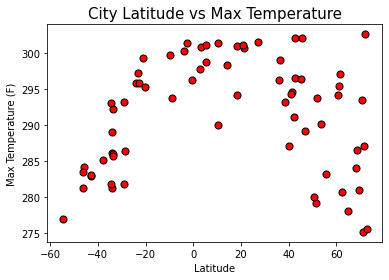

In [65]:
lat_plot = clean_city_data.plot(kind = 'scatter', x = 'Lat', y = 'Max Temp', color = 'red', edgecolor = 'black', s = 50)
plt.title('City Latitude vs Max Temperature', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

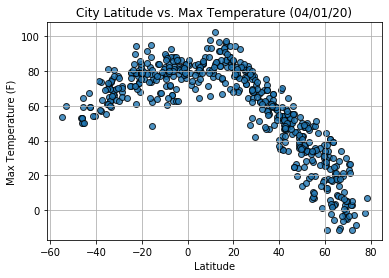

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

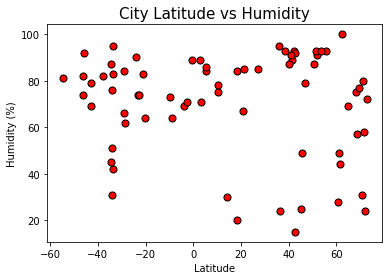

In [66]:
lat_plot = clean_city_data.plot(kind = 'scatter', x = 'Lat', y = 'Humidity', color = 'red', edgecolor = 'black', s = 50)
plt.title('City Latitude vs Humidity', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

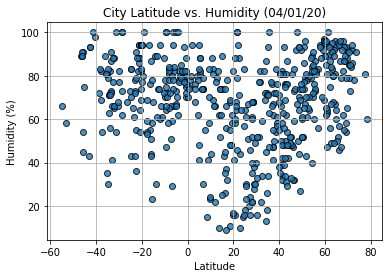

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

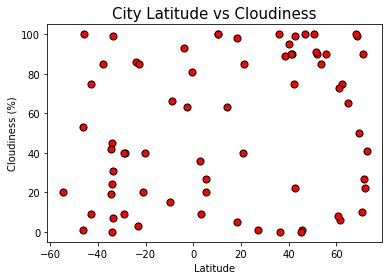

In [67]:
lat_plot = clean_city_data.plot(kind = 'scatter', x = 'Lat', y = 'Cloudiness', color = 'red', edgecolor = 'black', s = 50)
plt.title('City Latitude vs Cloudiness', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

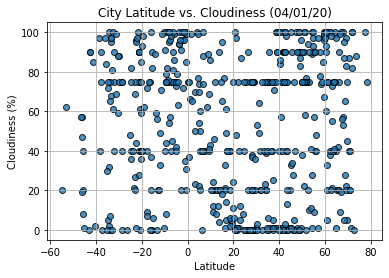

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

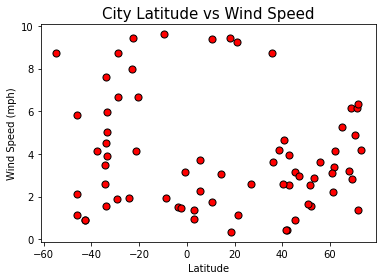

In [68]:
lat_plot = clean_city_data.plot(kind = 'scatter', x = 'Lat', y = 'Wind Speed', color = 'red', edgecolor = 'black', s = 50)
plt.title('City Latitude vs Wind Speed', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

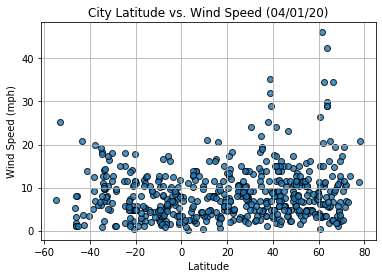

## Linear Regression

In [24]:
#slope, intercept, r, p, se = linregress(x, y)

In [37]:
north_hemi = clean_city_data.loc[clean_city_data['Lat'] > 0]
south_hemi = clean_city_data.loc[clean_city_data['Lat'] < 0]

In [40]:
south_hemi.reset_index()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,1,mount gambier,-37.8333,140.7667,285.10,82,85,4.12,AU,1624153649
1,2,dunedin,-45.8742,170.5036,284.15,92,100,5.81,NZ,1624153930
2,4,tuatapere,-46.1333,167.6833,281.25,74,1,1.14,NZ,1624153931
3,6,mataura,-46.1927,168.8643,283.45,82,53,2.10,NZ,1624153932
4,12,airai,-8.9266,125.4092,293.78,64,66,1.95,TL,1624153935
5,13,vaini,-21.2000,-175.2000,299.24,83,20,4.12,TO,1624153936
6,17,esperance,-33.8667,121.9000,286.06,51,45,7.59,AU,1624153938
7,20,geraldton,-28.7667,114.6000,286.38,62,40,6.69,AU,1624153727
8,22,new norfolk,-42.7826,147.0587,282.87,69,9,0.91,AU,1624153695
9,23,ushuaia,-54.8000,-68.3000,276.96,81,20,8.75,AR,1624153941


In [41]:
north_hemi.reset_index()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,jamestown,42.0970,-79.2353,291.09,93,75,0.45,US,1624153929
1,3,thompson,55.7435,-97.8558,283.24,93,90,3.60,CA,1624153931
2,5,sinnamary,5.3833,-52.9500,298.74,84,27,3.70,GF,1624153932
3,7,cherskiy,68.7500,161.3000,286.54,57,99,6.15,RU,1624153932
4,8,barrow,71.2906,-156.7887,275.16,80,90,6.17,US,1624153933
5,9,vestmanna,62.1564,-7.1664,280.66,100,75,4.12,FO,1624153933
6,10,portland,45.5234,-122.6762,302.02,49,1,0.89,US,1624153800
7,11,wageningen,51.9667,5.6667,293.76,91,90,1.54,NL,1624153934
8,14,butaritari,3.0707,172.7902,300.83,71,9,0.94,KI,1624153936
9,15,the valley,18.2170,-63.0578,300.98,84,5,9.45,AI,1624153764


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.3744971244246196


Text(0, 0.5, 'Max Temperature (F)')

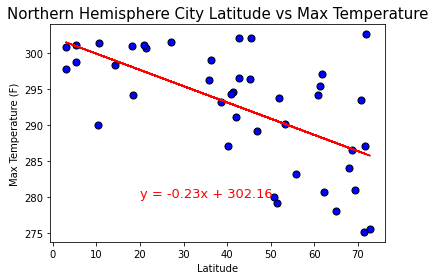

In [69]:
x_values = north_hemi['Lat']
y_values = north_hemi['Max Temp']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = north_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Max Temp',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (20,280), fontsize=13, color = 'r')
plt.title('Northern Hemisphere City Latitude vs Max Temperature', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

The r-value is: 0.46937863826630627


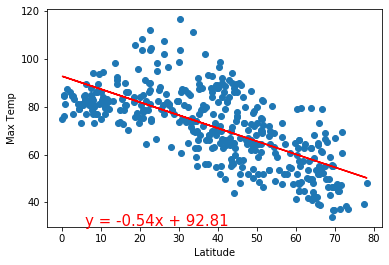

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.7203396466494726


Text(0, 0.5, 'Max Temperature (F)')

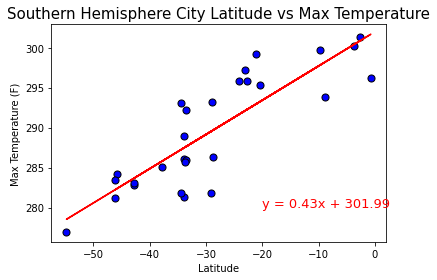

In [70]:
x_values = south_hemi['Lat']
y_values = south_hemi['Max Temp']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = south_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Max Temp',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (-20,280), fontsize=13, color = 'r')
plt.title('Southern Hemisphere City Latitude vs Max Temperature', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

The r-value is: 0.6082708688906918


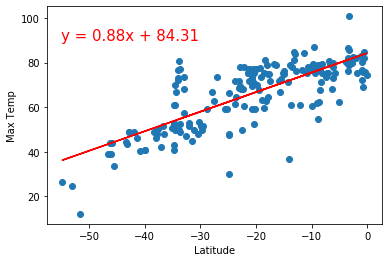

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.02298287738838846


Text(0, 0.5, 'Humidity (%)')

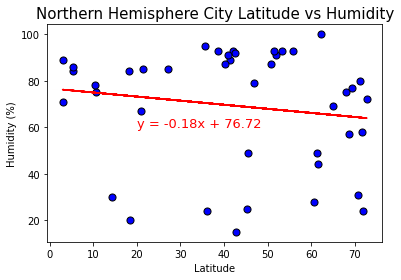

In [71]:
x_values = north_hemi['Lat']
y_values = north_hemi['Humidity']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = north_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Humidity',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (20,60), fontsize=13, color = 'r')
plt.title('Northern Hemisphere City Latitude vs Humidity', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

The r-value is: 0.000543987878808455


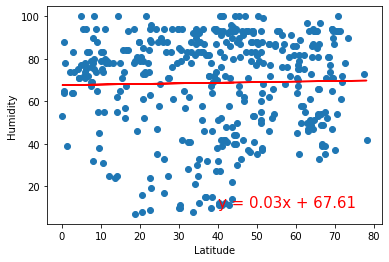

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.0015033461551614488


Text(0, 0.5, 'Humidity (%)')

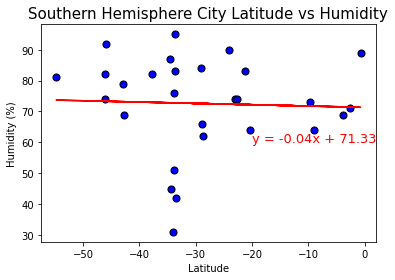

In [72]:
x_values = south_hemi['Lat']
y_values = south_hemi['Humidity']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = south_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Humidity',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (-20,60), fontsize=13, color = 'r')
plt.title('Southern Hemisphere City Latitude vs Humidity', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

The r-value is: 0.014985174297345524


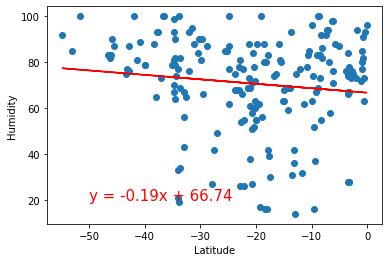

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.006196532061079524


Text(0, 0.5, 'Cloudiness (%)')

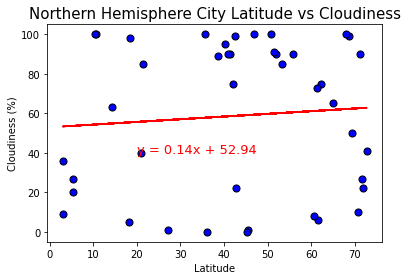

In [73]:
x_values = north_hemi['Lat']
y_values = north_hemi['Cloudiness']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = north_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Cloudiness',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (20,40), fontsize=13, color = 'r')
plt.title('Northern Hemisphere City Latitude vs Cloudiness', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

The r-value is: 0.0020898727664228514


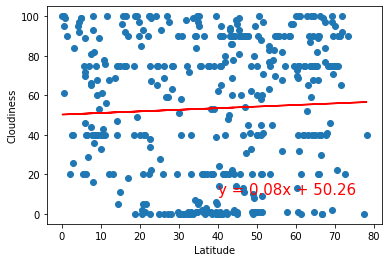

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.05930192517389337


Text(0, 0.5, 'Cloudiness (%)')

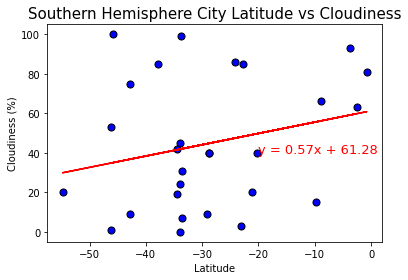

In [74]:
x_values = south_hemi['Lat']
y_values = south_hemi['Cloudiness']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = south_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Cloudiness',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (-20,40), fontsize=13, color = 'r')
plt.title('Southern Hemisphere City Latitude vs Cloudiness', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

The r-value is: 0.0035263772085582894


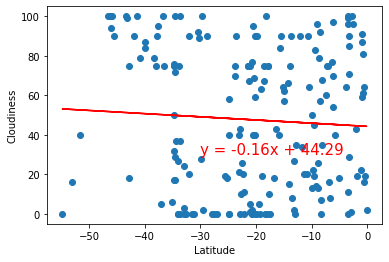

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.0022256171556458895


Text(0, 0.5, 'Wind Speed (mph)')

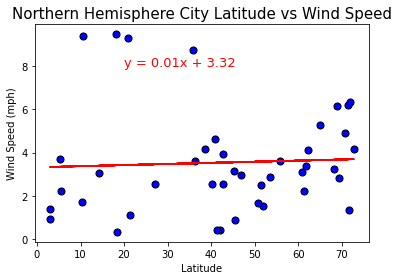

In [76]:
x_values = north_hemi['Lat']
y_values = north_hemi['Wind Speed']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = north_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Wind Speed',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (20,8), fontsize=13, color = 'r')
plt.title('Northern Hemisphere City Latitude vs Wind Speed', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

The r-value is: 0.04019723576144484


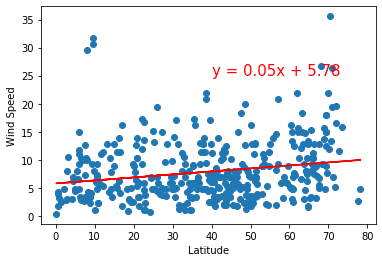

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.00011488797212530776


Text(0, 0.5, 'Wind Speed (mph)')

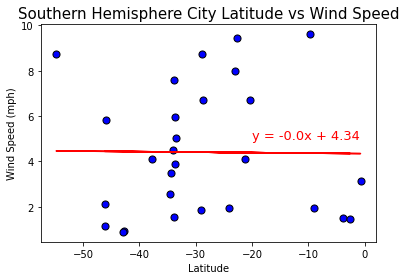

In [77]:
x_values = south_hemi['Lat']
y_values = south_hemi['Wind Speed']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = south_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Wind Speed',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (-20,5), fontsize=13, color = 'r')
plt.title('Southern Hemisphere City Latitude vs Wind Speed', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

The r-value is: 0.017128274759839232


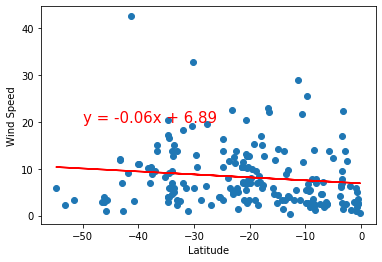